<div class="alert alert-info">
<h1>Regresión lineal</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [3]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#print(boston.DESCR);

In [8]:
rl = LinearRegression()
rl.fit(boston.data, boston.target)

predicciones = rl.predict(boston.data)
predicciones_df = pd.DataFrame(predicciones, columns=['Pred'])
predicciones_df.head()

,Pred
0,30.003843
1,25.025562
2,30.567597
3,28.607036
4,27.943524


In [11]:
np.mean(boston.target - predicciones)

3.033146856209123e-15

El desvio del model es pequeño, por lo tanto es confiable.

<div class="alert alert-info">
<h1>Regresión logística</h1>
</div>

In [14]:
from sklearn.linear_model import LogisticRegression

x, y = datasets.make_classification(n_samples=1000, n_features=4)

rlog = LogisticRegression(solver='liblinear')

x_train = x[:-200]
x_test = x[-200:]
y_train = y[:-200]
y_test = y[-200:]

rlog.fit(x_train, y_train)

y_predic_train = rlog.predict(x_train)
y_predic_test = rlog.predict(x_test)

In [15]:
entrenamiento = (y_predic_train == y_train).sum().astype(float) / y_train.shape[0]
print("sobre datos de entrenamiento: {0:.2f}".format(entrenamiento))
evaluacion = (y_predic_test == y_test).sum().astype(float) / y_test.shape[0]
print("sobre datos de evaluación: {0:.2f}".format(evaluacion))

sobre datos de entrenamiento: 0.90
sobre datos de evaluación: 0.90


<div class="alert alert-info">
<h1>Arboles de decisión</h1>
</div>

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

x, y = datasets.make_classification(1000, 20, n_informative=3)

ad = DecisionTreeClassifier(criterion='entropy', max_depth=5) 
ad.fit(x, y)

with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot)

# debemos tener instalado graphviz para que funcione el comando dot
!dot -Tjpeg mi_arbol.dot -o arbol_decision.jpeg

In [20]:
print("precisión del modelo: {0: .2f}".format((y == ad.predict(x)).mean()))

precisión del modelo:  0.92


<div class="alert alert-info">
<h1>Random Forest</h1>
</div>

In [23]:
from sklearn.ensemble import RandomForestClassifier

x, y = datasets.make_classification(1000)

rf = RandomForestClassifier(n_estimators=10) 
rf.fit(x, y) 

print("precisión del modelo: {0: .2f}".format((y == rf.predict(x)).mean()))

precisión del modelo:  0.99


<div class="alert alert-info">
<h1>SVM maquinas de soporte vectorial</h1>
</div>

/Users/developer/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


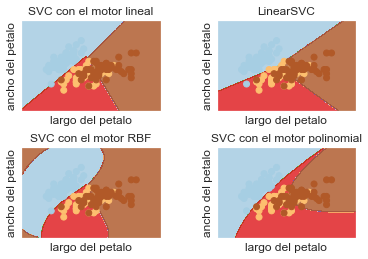

In [32]:
from sklearn import svm
import seaborn as sns
sns.set(style="darkgrid")

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

h = .02


C = 1.0  
svc = svm.SVC(kernel='linear', C=C, gamma='auto').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto').fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


<div class="alert alert-info">
<h1>KNN o k vecinos mas cercanos</h1>
</div>

In [33]:
from sklearn.neighbors import KNeighborsRegressor

iris = datasets.load_iris()
X = iris.data
y = iris.target

knnr = KNeighborsRegressor(n_neighbors=10) 
knnr.fit(X, y) 


print("El error medio del modelo es: {:.2f}".format(np.power(y - knnr.predict(X),
2).mean()))


El error medio del modelo es: 0.02


<div class="alert alert-info">
<h1>K-means</h1>
</div>

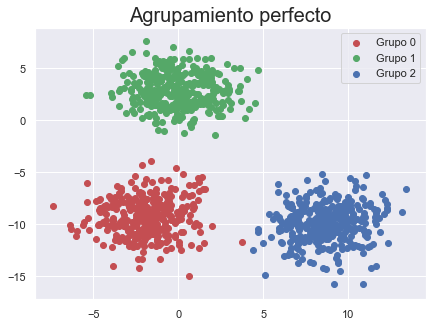

In [35]:
grupos, pos_correcta = datasets.make_blobs(1000, centers=3,
cluster_std=1.75)


f, ax = plt.subplots(figsize=(7, 5))
colores = ['r', 'g', 'b']

for i in range(3):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0], p[:,1], c=colores[i],
               label="Grupo {}".format(i))

ax.set_title("Agrupamiento perfecto", size=20)
ax.legend()

plt.show()

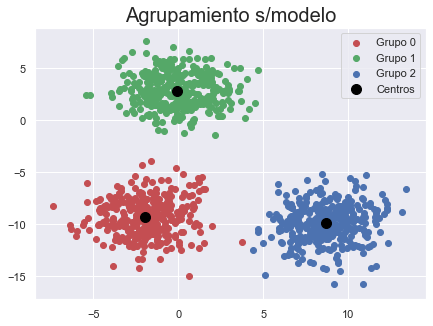

In [38]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(grupos) 


kmeans.cluster_centers_


f, ax = plt.subplots(figsize=(7, 5))
colores = ['r', 'g', 'b']

for i in range(3):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0], p[:,1], c=colores[i],
               label="Grupo {}".format(i))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           s=100, color='black', label='Centros')

ax.set_title("Agrupamiento s/modelo", size=20)
ax.legend()

plt.show() 